In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [6]:
nyc_data = pd.read_csv('~/dsi/repos/EDAcapstone/data/nyc_data.csv')

In [ ]:
nyc[nyc['price'] == 10000]

In [7]:
madrid_data = pd.read_csv('~/dsi/repos/EDAcapstone/data/madrid_data.csv')

In [8]:
madrid_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,65,2019-09-04,0.56,1,53
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,2018-07-15,0.55,2,48
2,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,2,2017-07-03,0.03,1,354
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,64,2019-07-07,0.63,1,301
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,136,2019-07-10,1.19,1,337


In [9]:
madrid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 16 columns):
id                                20837 non-null int64
name                              20832 non-null object
host_id                           20837 non-null int64
host_name                         20822 non-null object
neighbourhood_group               20837 non-null object
neighbourhood                     20837 non-null object
latitude                          20837 non-null float64
longitude                         20837 non-null float64
room_type                         20837 non-null object
price                             20837 non-null int64
minimum_nights                    20837 non-null int64
number_of_reviews                 20837 non-null int64
last_review                       16183 non-null object
reviews_per_month                 16183 non-null float64
calculated_host_listings_count    20837 non-null int64
availability_365                  20837 non-null int64

madrid_data.shape

In [7]:
madrid_data.shape

(20837, 16)

In [8]:
null_df = madrid_data[madrid_data['reviews_per_month'].isnull()]
null_df.shape

(4654, 16)

In [9]:
np.mean(null_df['availability_365'])

152.2872797593468

In [10]:
non_null = madrid_data[madrid_data['reviews_per_month'].notna()]
non_null.shape

(16183, 16)

In [11]:
np.mean(non_null['availability_365'])

155.90576530927515

In [12]:
np.mean(madrid_data['availability_365'])

155.09756682823823

In [13]:
null_df['neighbourhood'].value_counts()

Embajadores                   358
Universidad                   329
Palacio                       240
Justicia                      212
Sol                           189
Cortes                        161
Trafalgar                     103
Gaztambide                     88
Rosas                          76
Arapiles                       76
Guindalera                     72
Goya                           70
Palos de Moguer                68
Simancas                       67
Rios Rosas                     67
Almagro                        65
Argüelles                      64
Puerta del Angel               61
Recoletos                      61
Cuatro Caminos                 57
San Isidro                     55
Castellana                     53
Lista                          51
Ventas                         50
Castillejos                    50
Canillejas                     49
Numancia                       45
Bellas Vistas                  44
San Diego                      44
Pueblo Nuevo  

In [14]:
null_df.shape[0]/madrid_data.shape[0]

0.22335268992657292

In [15]:
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [16]:
null_df = nyc_data[nyc_data['reviews_per_month'].isnull()]
null_df.shape

(10052, 16)

In [17]:
np.mean(null_df['availability_365'])

104.66046557898926

In [18]:
non_null = nyc_data[nyc_data['reviews_per_month'].notna()]
non_null.shape

(38843, 16)

In [19]:
np.mean(non_null['availability_365'])

114.88288752156116

In [20]:
non_null.shape[0]/nyc_data.shape[0]

0.7944166070150323

In [32]:
x = nyc_data.groupby(['room_type','neighbourhood']).agg({'room_type':'count'})

In [100]:
x.loc[('Private room', 'Allerton')]
counts_pr = [(i,x.loc[('Private room', i)]['room_type'])for i in top20_labels]
counts_er = [(i,x.loc[('Entire home/apt', i)]['room_type'])for i in top20_labels]
counts_sr = [(i,x.loc[('Shared room', i)]['room_type'])for i in top20_labels]


In [101]:
counts_er

[('Williamsburg', 1891),
 ('Bedford-Stuyvesant', 1591),
 ('Harlem', 1036),
 ('Bushwick', 678),
 ('Upper West Side', 1256),
 ("Hell's Kitchen", 1187),
 ('East Village', 1170),
 ('Upper East Side', 1310),
 ('Crown Heights', 759),
 ('Midtown', 1100),
 ('East Harlem', 486),
 ('Greenpoint', 622),
 ('Chelsea', 820),
 ('Lower East Side', 506),
 ('Astoria', 381),
 ('Washington Heights', 296),
 ('West Village', 653),
 ('Financial District', 572),
 ('Flatbush', 261),
 ('Clinton Hill', 346)]

In [102]:
counts_pr

[('Williamsburg', 1997),
 ('Bedford-Stuyvesant', 2038),
 ('Harlem', 1573),
 ('Bushwick', 1719),
 ('Upper West Side', 675),
 ("Hell's Kitchen", 672),
 ('East Village', 660),
 ('Upper East Side', 441),
 ('Crown Heights', 780),
 ('Midtown', 422),
 ('East Harlem', 586),
 ('Greenpoint', 476),
 ('Chelsea', 278),
 ('Lower East Side', 367),
 ('Astoria', 494),
 ('Washington Heights', 576),
 ('West Village', 112),
 ('Financial District', 162),
 ('Flatbush', 339),
 ('Clinton Hill', 217)]

In [103]:
counts_sr

[('Williamsburg', 32),
 ('Bedford-Stuyvesant', 85),
 ('Harlem', 49),
 ('Bushwick', 68),
 ('Upper West Side', 40),
 ("Hell's Kitchen", 99),
 ('East Village', 23),
 ('Upper East Side', 47),
 ('Crown Heights', 25),
 ('Midtown', 23),
 ('East Harlem', 45),
 ('Greenpoint', 17),
 ('Chelsea', 15),
 ('Lower East Side', 38),
 ('Astoria', 25),
 ('Washington Heights', 27),
 ('West Village', 3),
 ('Financial District', 10),
 ('Flatbush', 21),
 ('Clinton Hill', 9)]

In [40]:
neighborhood_listing_count = nyc_data['neighbourhood'].value_counts()
top20_nyc_neighborhoods = neighborhood_listing_count[:20]
top20_labels = top20_nyc_neighborhoods.index

In [47]:
top20 = [row for i in top20_labels for row in nyc_data.iterrows() if row['neighbourhood'] == i]
type_listings_nyc = top20.groupby(['room_type']).agg({'room_type':'count'})
top20_type_nyc = type_listings_nyc.loc(top20_labels)
top20_entire_home_count = top20_type_nyc['Entire home/apt']
top20_private_room_count = top20_type_nyc['Private room']
top20_shared_room_count = top20_type_nyc['Shared room']

TypeError: string indices must be integers

In [23]:
sy = y.sort_values(by = ['mean'], ascending = False)

In [24]:
z = x['neighbourhood']


In [25]:
cols = z.sort_values(by = 'count', ascending = False).head(30).index

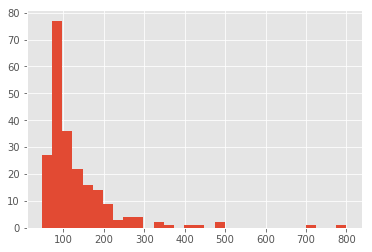

In [26]:
fig, ax = plt.subplots(1,1)
ax.hist(x['price']['mean'], bins = 30, label = 'mean')
#ax.hist(x['price']['min'], bins = 30, label = 'min')
#ax.hist(x['price']['max'], bins = 30,  label = 'max')
#plt.legend()
plt.show()

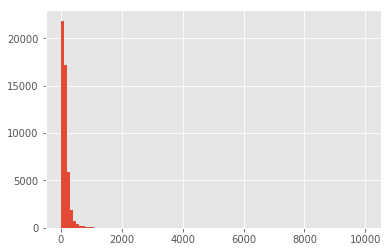

In [144]:
fig, ax = plt.subplots(1,1)
ax.hist(nyc_data['price'], bins = 100)
#ax.set_xlim(0, 6000)
plt.show()

In [28]:
nyc_data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [52]:
boros = nyc_data.groupby(['neighbourhood_group']).agg({'price': ['min','mean', 'max'], 'neighbourhood_group':'count'})
cols = boros.index

In [30]:
entire_home = nyc_data[nyc_data['room_type'] == 'Entire home/apt']
private = nyc_data[nyc_data['room_type'] == 'Private room']
shared = nyc_data[nyc_data['room_type'] == 'Shared room']

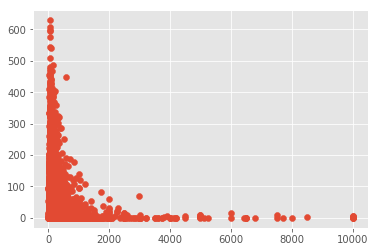

In [98]:
fig, ax = plt.subplots(1,1)
# ax.hist(nyc_data['price'], bins = 100, density = True, label = 'entire home')
ax.scatter(nyc_data['price'], nyc_data['number_of_reviews'])
#ax.hist(private['price'], bins = 100, label = 'private room')
#ax.hist(shared['price'], bins = 100, label = 'shared room')

plt.show()

In [39]:
y = nyc_data['price'].value_counts()

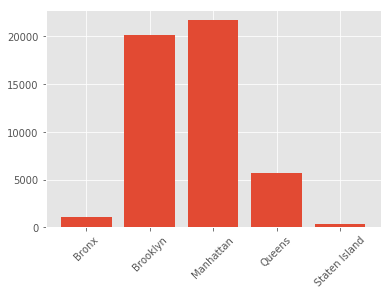

In [57]:
fig, ax = plt.subplots(1,1)
labels = cols
data = boros['neighbourhood_group']['count']
ax.bar(range(len(data)), data)
ax.set_xticks(range(len(data)))
ax.set_xticklabels(labels, rotation=45)
plt.show()

In [58]:
boros

price                    neighbourhood_group
                      min        mean    max               count
neighbourhood_group                                             
Bronx                   0   87.496792   2500                1091
Brooklyn                0  124.383207  10000               20104
Manhattan               0  196.875814  10000               21661
Queens                 10   99.517649  10000                5666
Staten Island          13  114.812332   5000                 373

In [159]:
import scipy.stats as stats
import random 

def sample_from_repeated_sum(n_samples, n_summands, sampler):
    """Sample n_samples from the sum of n_summands iid copies of a random
    varaible.
    """
    samples = np.array(random.choices(sampler,k = n_samples*n_summands)).reshape(n_samples, n_summands)
    return np.sum(samples, axis=1)

def sample_means_from_population(n_samples, n_summands, sampler): 
    return (1.0/n_summands) * sample_from_repeated_sum(n_samples, n_summands, sampler)


In [160]:
mean_sample_means = np.mean(sample_means)
variance_sample_means = np.var(sample_means)
sample_means_model = stats.norm(mean_sample_means, 
                                np.sqrt(variance_sample_means))

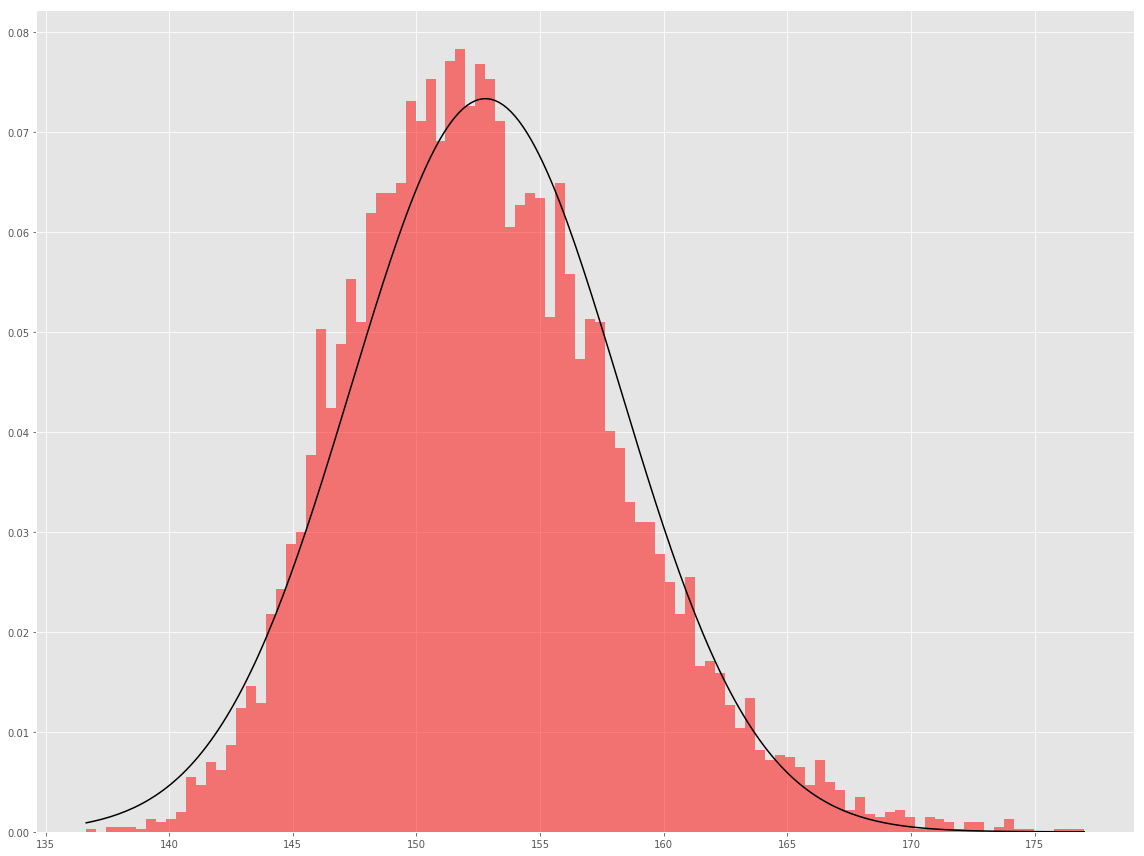

In [161]:
# sample_means = sample_means_from_population(
#     n_samples=10000, n_summands=3000, sampler=nyc_data['price'])

# fig, ax = plt.subplots(1, figsize=(10, 4))
# _ = ax.hist(sample_means, bins=50, density=True, color="red", alpha=0.5)
# _ = ax.plot(t, sample_means_model.pdf(t), color="black")
# t = np.linspace(min(sample_means), max(sample_means), num=250)
# _ = ax.set_title("Distributon of Sample Means (Sample Size = 3000)")
size_of_sample = [100, 200, 500, 550, 1000, 1050, 2000, 4000, 5000]

fig, axs = plt.subplots(1, 1, figsize=(16, 12))


# sample_means = sample_means_from_population(
#     n_samples=10000, n_summands=2000, sampler=nyc_data['price'])
# mean_sample_means = np.mean(sample_means)
# variance_sample_means = np.var(sample_means)
# sample_means_model = stats.norm(mean_sample_means, 
#                                 np.sqrt(variance_sample_means))
axs.hist(sample_means, bins=100, density=True, color="red", alpha=0.5)
t = np.linspace(min(sample_means), max(sample_means), num=250)
axs.plot(t, sample_means_model.pdf(t), color="black")
_ = ax.set_title("Sample Size = {}".format(sample_size), fontsize=16)
fig.tight_layout()

In [162]:
variance_sample_means

29.59183385679391

In [158]:
random.seed(5999)
pop = [1,2,3,4,5,6]
sample_from_repeated_sum(50, 5, pop).mean()

3.44

In [153]:
np.mean(pop)

3.5

In [155]:

# def sample_from_repeated_sum(n_samples, n_summands, sampler):
#     """Sample n_samples from the sum of n_summands iid copies of a random
#     varaible.
#     """
#     samples = np.array(random.choices(sampler,k = n_samples*n_summands)).reshape(n_samples, n_summands)
#     return np.mean(samples, axis=1)

# def sample_means_from_population(n_samples, n_summands, sampler): 
#     return (1.0/n_summands) * sample_from_repeated_sum(n_samples, n_summands, sampler)


In [144]:
sample_means_from_population(50, 5, pop)

0.09704228571428572

In [16]:
import geopandas as gpd

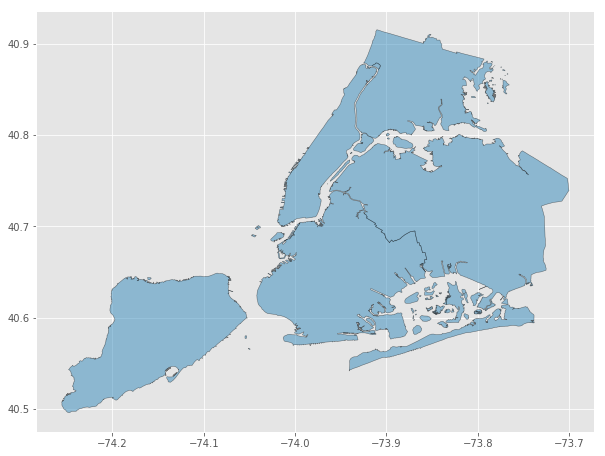

In [82]:
df = geopandas.read_file('borough/geo_export_91122496-4899-4211-a64b-3cf55c0ddeae.shp')
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [84]:
nyc_data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [141]:
bk = nyc_data[nyc_data['neighbourhood_group'] == 'Brooklyn'].reset_index()
hat = nyc_data[nyc_data['neighbourhood_group'] == 'Manhattan'][['latitude','longitude']]
queen = nyc_data[nyc_data['neighbourhood_group'] == 'Queens'][['latitude','longitude']]
staten = nyc_data[nyc_data['neighbourhood_group'] == 'Staten Island'][['latitude','longitude']]
bronx = nyc_data[nyc_data['neighbourhood_group'] == 'Bronx'][['latitude','longitude']]
gbk = geopandas.GeoDataFrame(bk, geometry=geopandas.points_from_xy(bk.longitude, bk.latitude))
ghat = geopandas.GeoDataFrame(hat, geometry=geopandas.points_from_xy(hat.longitude, hat.latitude))
gq = geopandas.GeoDataFrame(queen, geometry=geopandas.points_from_xy(queen.longitude, queen.latitude))
gstat = geopandas.GeoDataFrame(staten, geometry=geopandas.points_from_xy(staten.longitude, staten.latitude))
gbron = geopandas.GeoDataFrame(bronx, geometry=geopandas.points_from_xy(bronx.longitude, bronx.latitude))


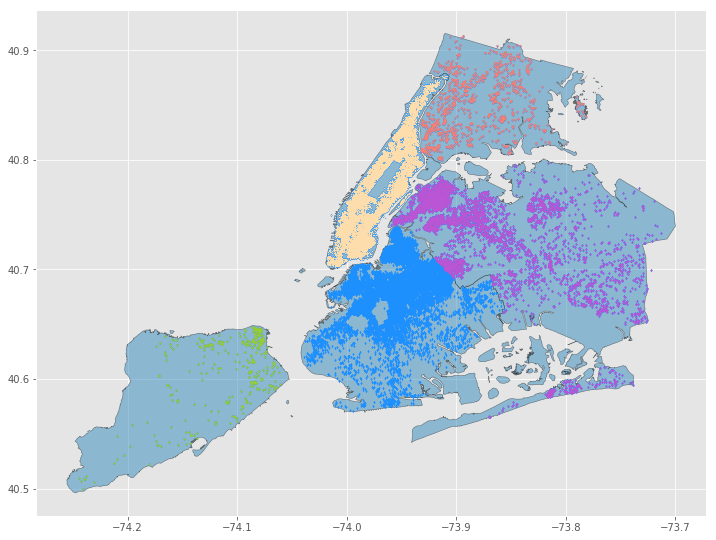

In [143]:
#gbk = geopandas.GeoDataFrame(nyc, geometry=geopandas.points_from_xy(nyc.longitude, nyc.latitude))
fig, ax = plt.subplots(1,1, figsize = (12,12))
ax.set_aspect('equal')
colors = {'Brooklyn': 'dodgerblue', 'Bronx': 'salmon', 'Manhattan': 'navajowhite', 'Staten Island': 'yellowgreen', 'Queens': 'mediumorchid'}
base = df.plot(ax = ax, alpha=0.5, edgecolor='k')
gbk.plot(ax = ax, marker='d', color='dodgerblue', markersize=3)
ghat.plot(ax = ax, marker='.', color='navajowhite', markersize=3)
gstat.plot(ax = ax, marker='p', color='yellowgreen', markersize=3)
gq.plot(ax = ax, marker='*', color='mediumorchid', markersize=3)
gbron.plot(ax = ax, marker='v', color='salmon', markersize=3)




In [ ]:
nyc[]

In [148]:
cords.plot(ax = ax, marker='o', color='red', markersize=5)
cord

NameError: name 'cord' is not defined

In [131]:
colors = {'Brooklyn': 'dodgerblue', 'Bronx': 'salmon', 'Manhattan': 'navajowhite', 'Staten Island': 'yellowgreen', 'Queens': 'mediumorchid'}
nyc = nyc_data.copy()
nyc['colors'] = nyc['neighbourhood_group']

In [132]:
nyc['colors'].replace(colors, inplace = True)

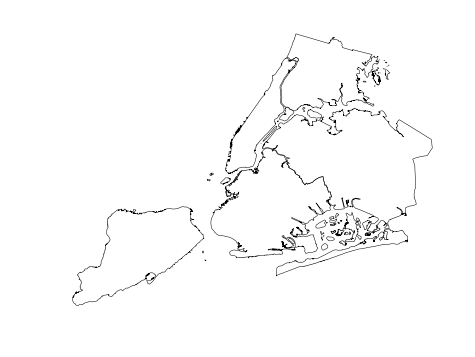

In [173]:
import geoplot
collisions = geopandas.read_file(geoplot.datasets.get_path('nyc_injurious_collisions'))
boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))
geoplot.polyplot(df)
amen = gnyc[['price', 'geometry']]

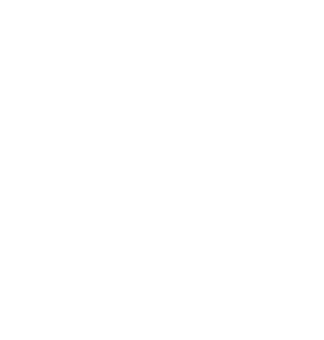

In [177]:
#fig, ax = plt.subplots(1,1, figsize = (12,12))
#ax.set_aspect('equal')
gnyc = geopandas.GeoDataFrame(nyc, geometry=geopandas.points_from_xy(nyc.longitude, nyc.latitude))
# base = df.plot(ax = ax, alpha=0.5, edgecolor='k')
ax = geoplot.kdeplot(
    amen, clip=amen.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(df, ax=ax, zorder=1)

In [166]:
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,colors,geometry
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,dodgerblue,POINT (-73.97237 40.64749)
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,navajowhite,POINT (-73.98377 40.75362)
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,navajowhite,POINT (-73.94190 40.80902)
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,dodgerblue,POINT (-73.95976 40.68514)
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,navajowhite,POINT (-73.94399 40.79851)


look into host listing count to figure out how hosts price of each of the listings

In [13]:
import seaborn as sns

In [14]:
sns.boxplot(x = 'neighbourhood_group', y = 'price', data = nyc)

NameError: name 'nyc' is not defined

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

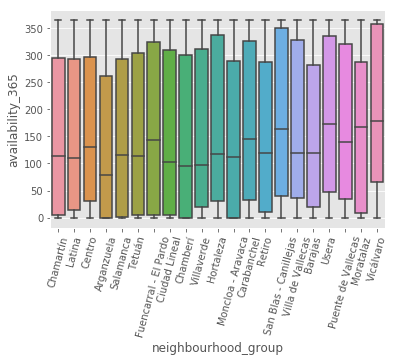

In [29]:
sns.boxplot(x = 'neighbourhood_group', y = 'availability_365', data = madrid_data)
plt.xticks(rotation = 75)

In [53]:
aval = nyc_data[nyc_data['price'] < 500]
aval.shape

(47660, 16)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

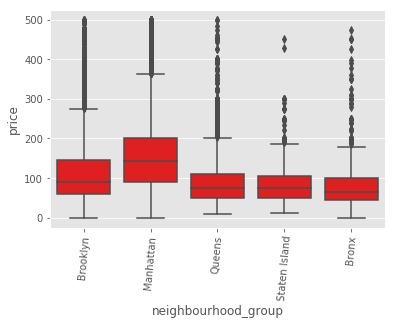

In [54]:
sns.boxplot(x = 'neighbourhood_group', y = 'price', color = 'r', data = aval)
plt.xticks(rotation = 85)

In [195]:
aval = nyc[nyc['availability_365'] == 0]

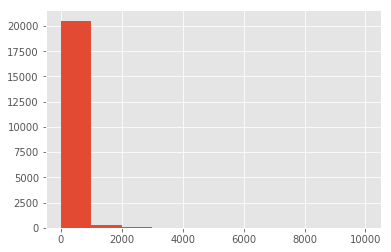

In [36]:
madrid_data['price'].hist()


In [37]:
fig, axs = plt.subplots(2,2)
col = ['price', 'numbe_of reviews', 'minimum_nights','availability_365']
for ax in flatten(axs):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-37-aeb2c46034f7>, line 4)

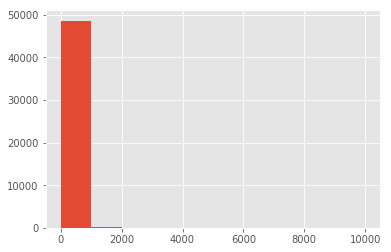

In [38]:
nyc_data['price'].hist()

In [44]:
print(nyc_data.describe()['price'])
print(madrid_data.describe()['price'])

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
count    20837.000000
mean       134.065364
std        381.207575
min          8.000000
25%         40.000000
50%         65.000000
75%        100.000000
max       9999.000000
Name: price, dtype: float64
